In [1]:
import sys
sys.path.append('../src')

In [2]:
from metrics import calculate_false_alarm, calculate_delay, calculate_precision, compute_metrics
from loading import *
from visualization import *
from features import *
from helpers import *

from matplotlib import pyplot as plt
%matplotlib inline

# Extract metrics for feature according to threshold value

In [3]:
data_path = "../data/"
patient_data = load_patient_seizures(data_path, 2,all_seizures=True, delta=1)

In [4]:
eegs = patient_data['eegs']
ranges = patient_data['ranges']
seizure_start_s = patient_data["infos"]["seizure_start"]
seizure_end_s = patient_data["infos"]["seizure_end"] 

In [5]:
num_sensors = len(eegs[0][0])
ordered_power_eeg = top_signals(eegs, ranges, top=num_sensors, id_seizure = None)
max_power_eeg = ordered_power_eeg[0]
min_power_eeg = ordered_power_eeg[-1]

## Convert seizure sample ranges into sliding window ranges

In [6]:
window_size = 128
step_size = 64

In [7]:
indexes = convert_sample_ranges_to_window_ranges(ranges,window_size,step_size,1843200)
indexes_ = convert_sample_ranges_to_window_ranges(ranges,window_size*8,step_size*8,1843200)
indexes_1 = convert_sample_ranges_to_window_ranges(ranges, 1024, 512,1843200)

## Computing signal features

In [8]:
min_feature_signals = calculate_feature(eegs, window_size, step_size, calculate_min, max_power_eeg)

In [9]:
max_feature_signals = calculate_feature(eegs, window_size, step_size, calculate_max, max_power_eeg)

In [10]:
energy_feature_signals = calculate_feature(eegs, window_size, step_size, calculate_energy, max_power_eeg)

In [11]:
line_length_feature_signals = calculate_feature(eegs, window_size, step_size, calculate_line_length, max_power_eeg)

In [12]:
moving_avg_feature_signals = calculate_feature(eegs, window_size, step_size, calculate_moving_avg, max_power_eeg)

In [13]:
skewness_feature_signals = calculate_feature(eegs, window_size, step_size, calculate_skewness, max_power_eeg)

In [14]:
kurtosis_feature_signals = calculate_feature(eegs, window_size, step_size, calculate_kurtosis, max_power_eeg)

In [15]:
shannon_entropy_feature_signals = calculate_feature(eegs, window_size, step_size, calculate_shannon_entropy, max_power_eeg)

In [16]:
lbp_feature_signals = calculate_feature(eegs, 1024, 512, calculate_lbp, min_power_eeg, max_power_eeg)

In [17]:
phase_synchrony_feature_signals = calculate_feature(eegs, window_size, step_size, calculate_phase_synchrony, max_power_eeg, min_power_eeg)

## Plotting real signal and computed feature signal for seizure 0

In [18]:
signal = real_signal = eegs[0][1][max_power_eeg].T

In [19]:
min_seizure1_single = min_feature_signals[0][1]
min_seizure1_single_scaled = scale_signal(min_seizure1_single, window_size, step_size)

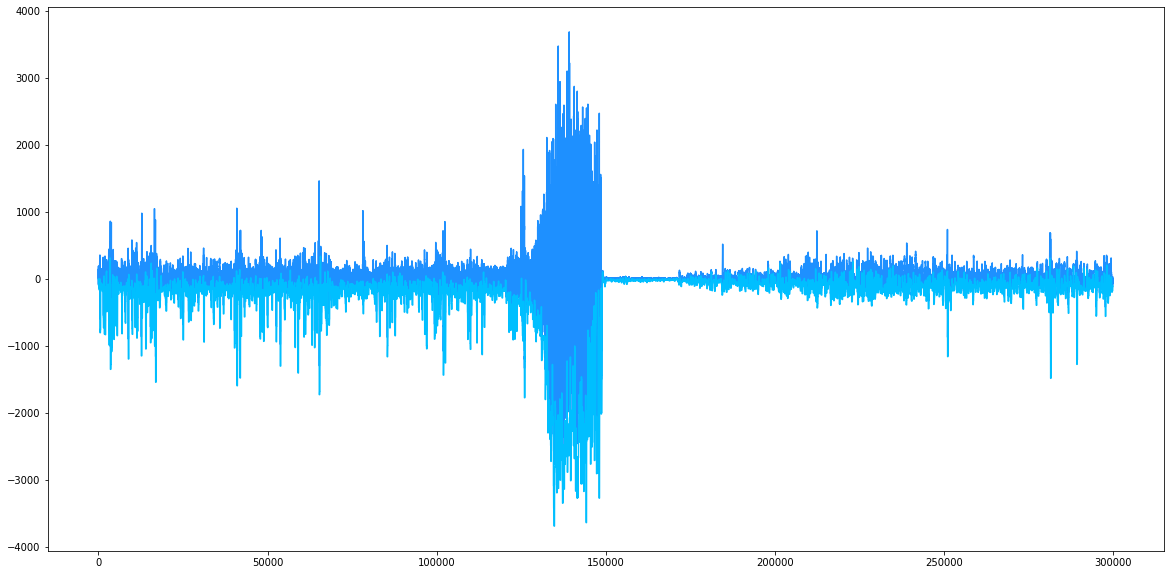

In [20]:
plot_feature(signal, min_seizure1_single_scaled, 0, 300000)

In [21]:
max_seizure1_single = max_feature_signals[0][1]
max_seizure1_single_scaled = scale_signal(max_seizure1_single, window_size, step_size)

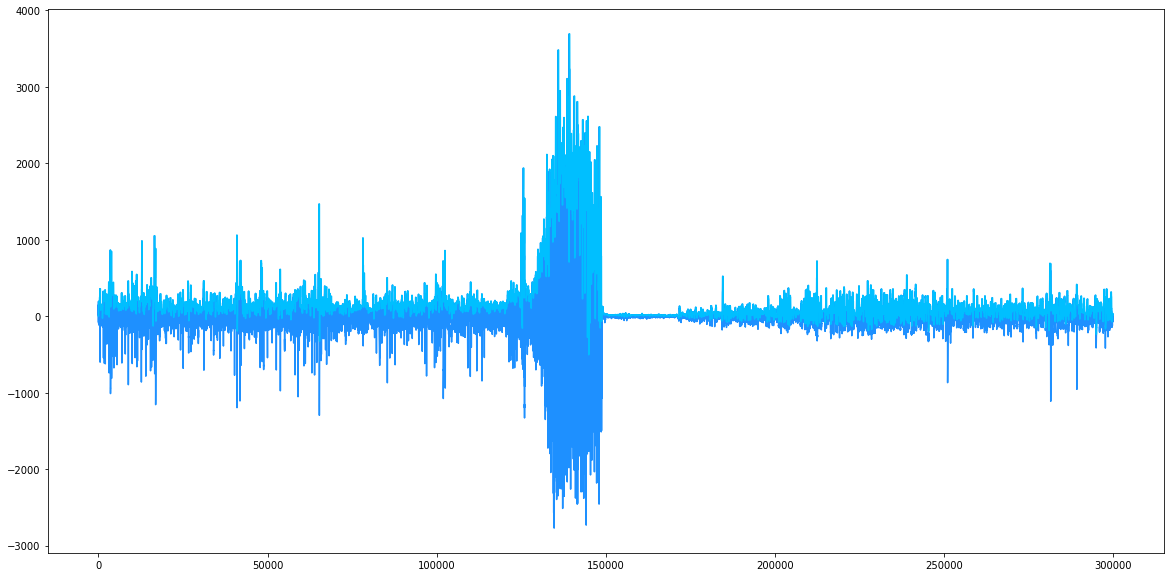

In [22]:
plot_feature(signal, max_seizure1_single_scaled, 0, 300000)

In [23]:
energy_seizure1_single = energy_feature_signals[0][1]
energy_seizure1_single_scaled = scale_signal(energy_seizure1_single, window_size, step_size)

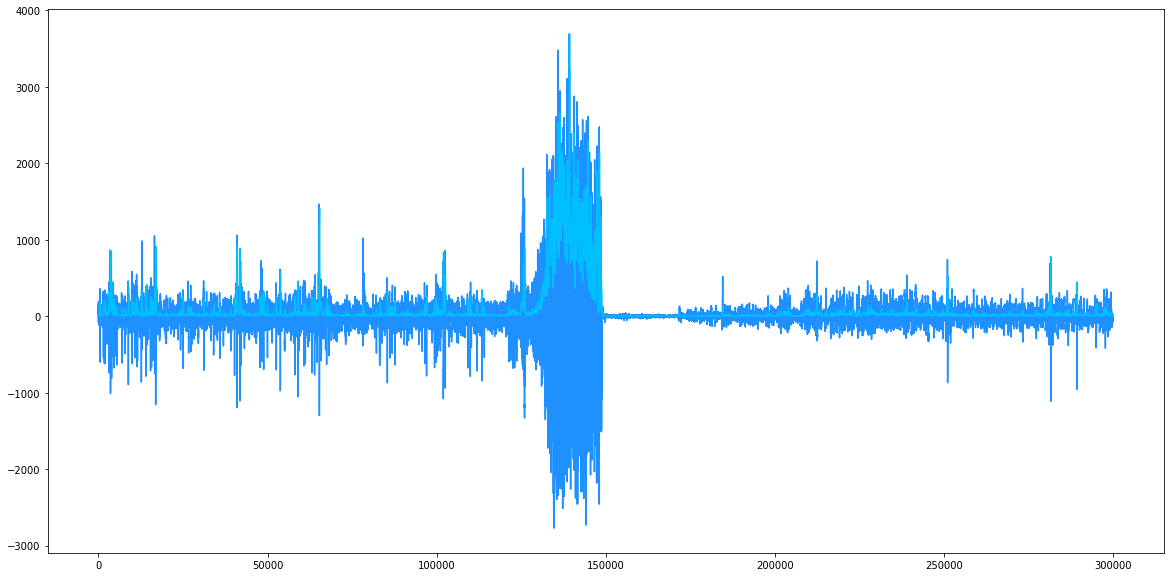

In [24]:
plot_feature(signal, energy_seizure1_single_scaled, 0, 300000)

In [25]:
line_length_seizure1_single = line_length_feature_signals[0][1]
line_length_seizure1_single_scaled = scale_signal(line_length_seizure1_single, window_size, step_size)

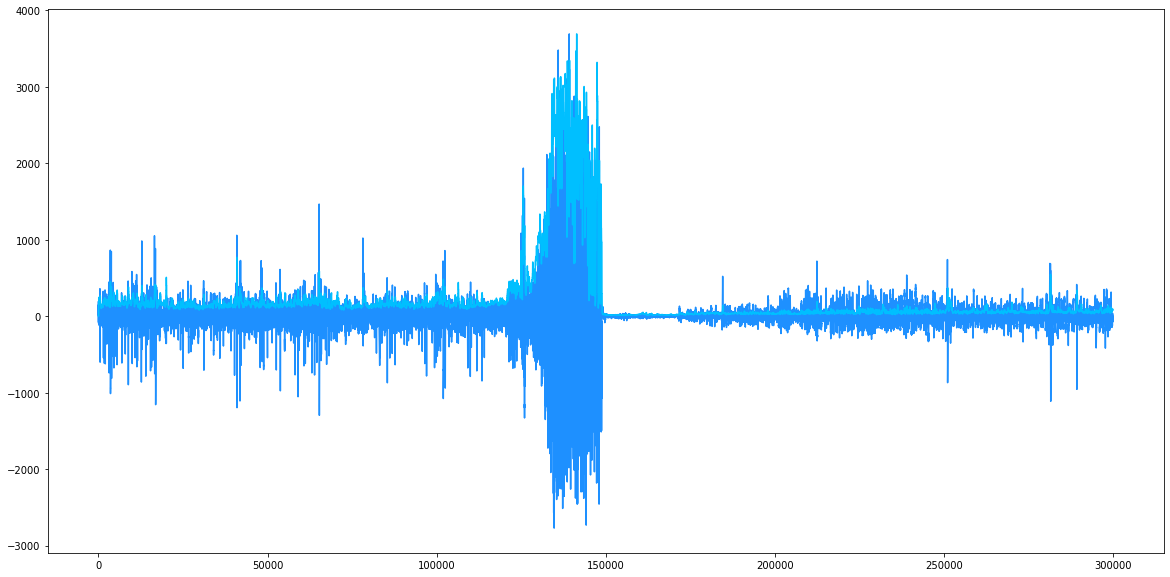

In [26]:
plot_feature(signal, line_length_seizure1_single_scaled, 0, 300000)

In [27]:
moving_avg_seizure1_single = moving_avg_feature_signals[0][1]
moving_avg_seizure1_single_scaled = scale_signal(moving_avg_seizure1_single, window_size, step_size)

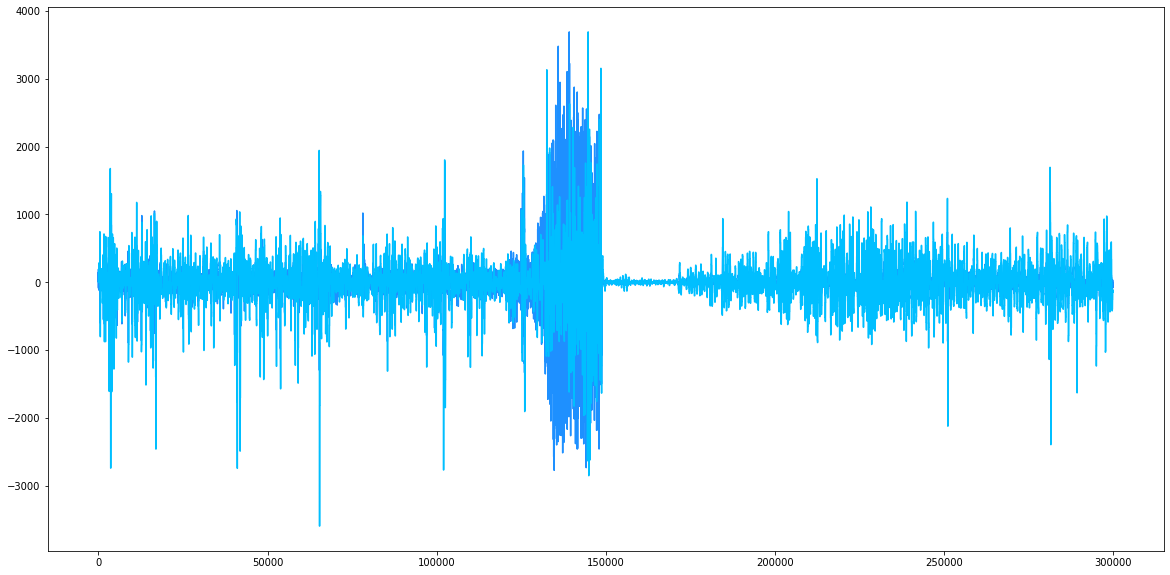

In [28]:
plot_feature(signal, moving_avg_seizure1_single_scaled, 0, 300000)

In [29]:
skewness_seizure1_single = skewness_feature_signals[0][1]
skewness_seizure1_single_scaled = scale_signal(skewness_seizure1_single, window_size, step_size)

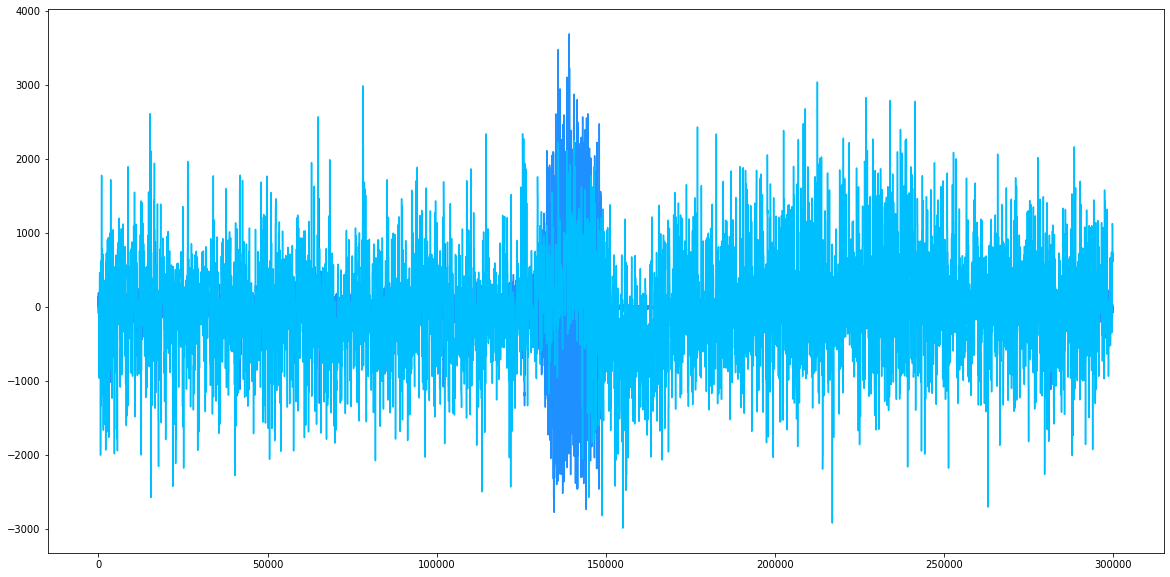

In [30]:
plot_feature(signal, skewness_seizure1_single_scaled, 0, 300000)

In [31]:
kurtosis_seizure1_single = kurtosis_feature_signals[0][1]
kurtosis_seizure1_single_scaled = scale_signal(kurtosis_seizure1_single, window_size, step_size)

In [32]:
print(max(kurtosis_seizure1_single))

9156397.100407025


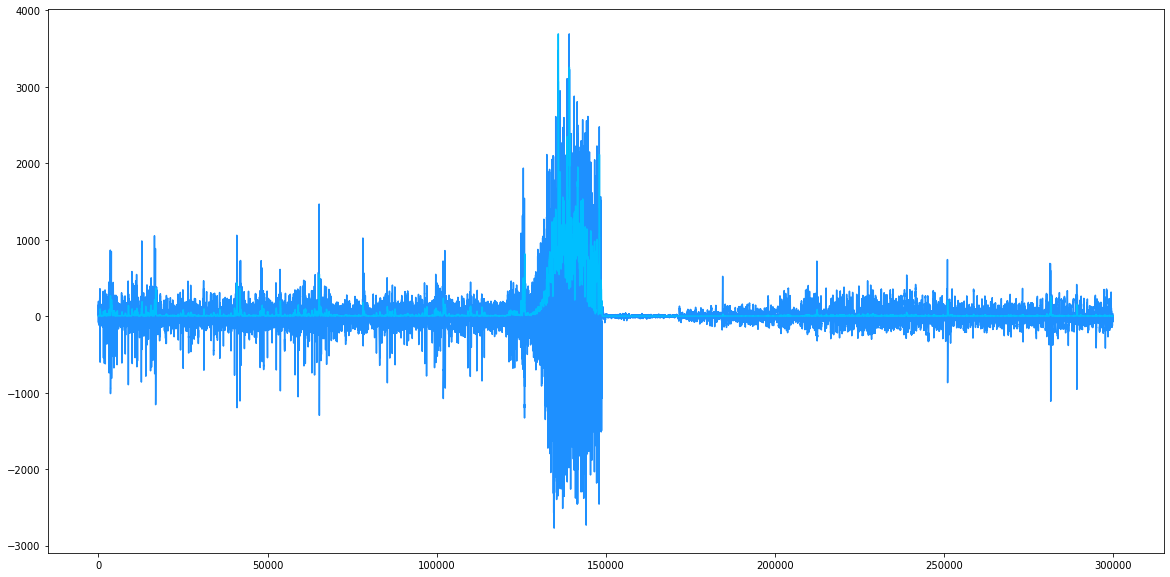

In [33]:
plot_feature(signal, kurtosis_seizure1_single_scaled, 0, 300000)

In [34]:
shannon_entropy_seizure1_single = shannon_entropy_feature_signals[0][1]
shannon_entropy_seizure1_single_scaled = scale_signal(shannon_entropy_seizure1_single, window_size, step_size)

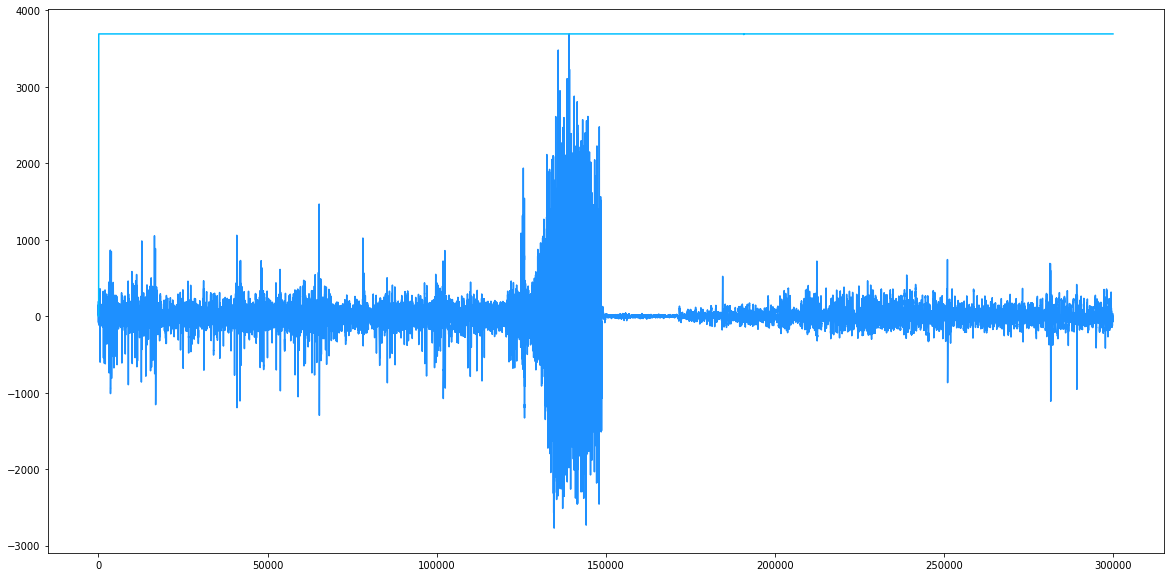

In [35]:
plot_feature(signal, shannon_entropy_seizure1_single_scaled, 0, 300000)

In [36]:
lbp_seizure1_single = lbp_feature_signals[0][1]
lbp_seizure1_single_scaled = scale_signal(lbp_seizure1_single, 1024, 512)

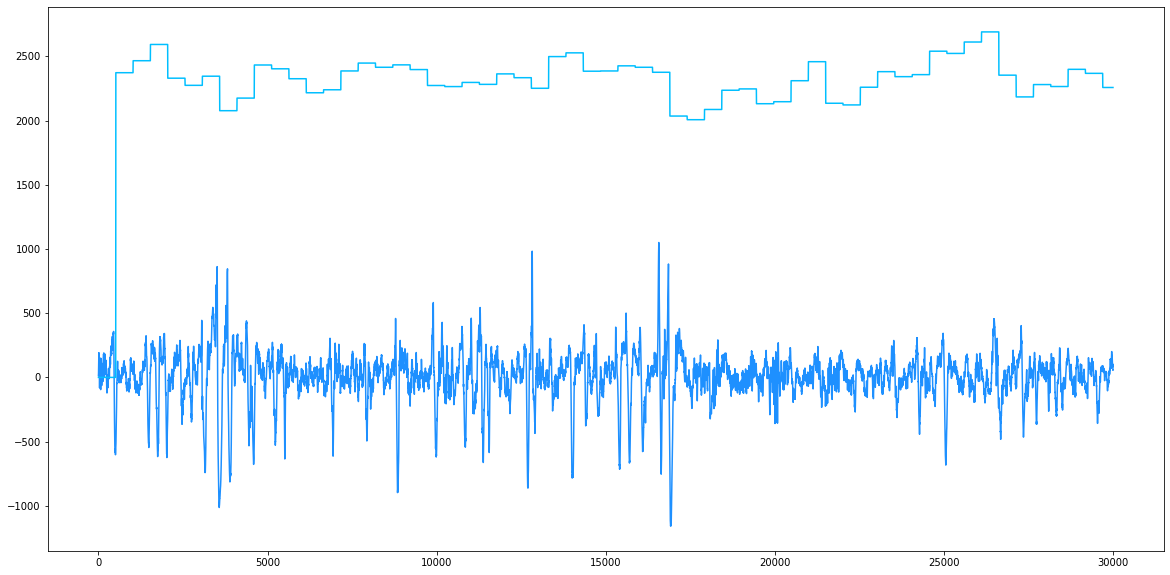

In [37]:
plot_feature(signal, lbp_seizure1_single_scaled, 0, 30000)

In [38]:
phase_synchrony_seizure1_single = phase_synchrony_feature_signals[0][1]
phase_synchrony_seizure1_single_scaled = scale_signal(phase_synchrony_seizure1_single, window_size, step_size)

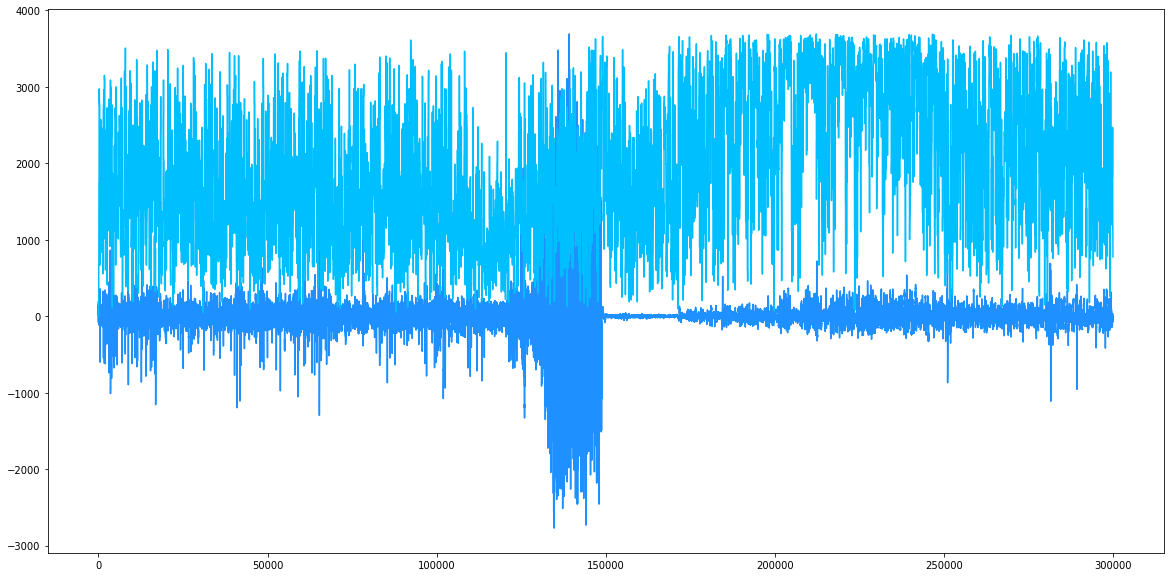

In [39]:
plot_feature(signal, phase_synchrony_seizure1_single_scaled, 0, 300000)

In [40]:
def preprocess_phase_synchrony(signal):
    inv_signal = 1/(np.array(signal)+1)
    return np.min(inv_signal)

In [41]:
rescaled_phase_synchrony_feature_signals = scale_signal_all_data(phase_synchrony_feature_signals, window_size, step_size)
preprocessed_phase_synchrony_feature_signals = calculate_feature(rescaled_phase_synchrony_feature_signals, window_size*8, step_size*8, preprocess_phase_synchrony)

In [42]:
preprocessed_phase_synchrony_seizure1_single = preprocessed_phase_synchrony_feature_signals[0][1]
preprocessed_phase_synchrony_seizure1_single_scaled_ = scale_signal(preprocessed_phase_synchrony_seizure1_single, window_size*8, step_size*8)

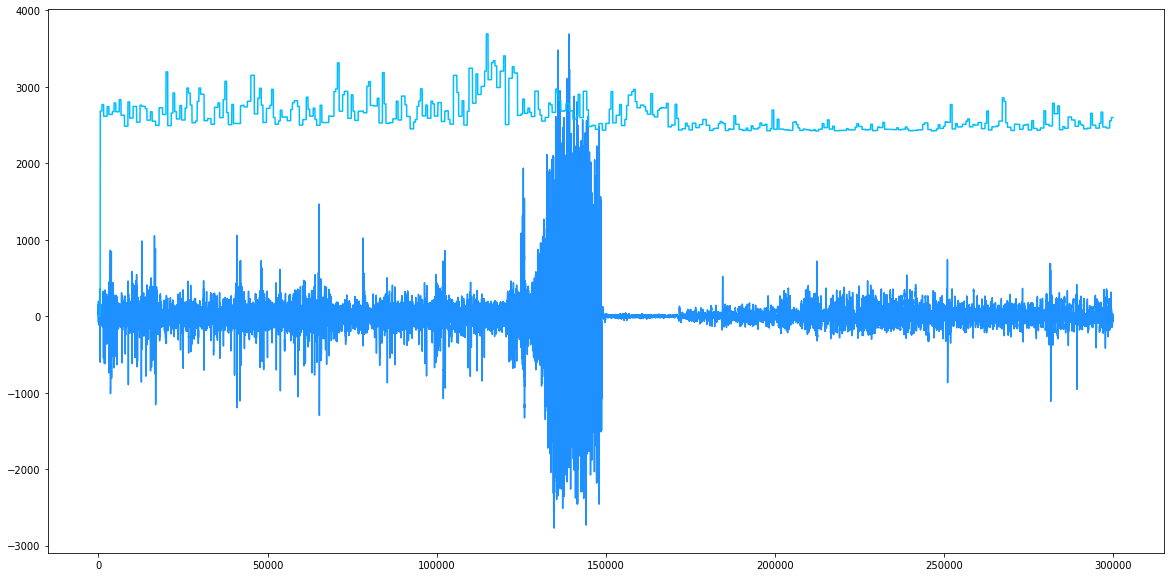

In [43]:
plot_feature(signal, preprocessed_phase_synchrony_seizure1_single_scaled_, 0, 300000)

# Merging data into one single list

In [44]:
all_data_window_ranges, all_data_min = merge_all_data(min_feature_signals, indexes)
_, all_data_max = merge_all_data(max_feature_signals, indexes)
_, all_data_energy = merge_all_data(energy_feature_signals, indexes)
_, all_data_line_length = merge_all_data(line_length_feature_signals, indexes)
_, all_data_moving_avg = merge_all_data(moving_avg_feature_signals, indexes)
_, all_data_skewness = merge_all_data(skewness_feature_signals, indexes)
_, all_data_kurtosis = merge_all_data(kurtosis_feature_signals, indexes)
_, all_data_shannon_entropy = merge_all_data(shannon_entropy_feature_signals, indexes)
all_data_window_ranges_1, all_data_lbp = merge_all_data(lbp_feature_signals, indexes_1)
all_data_window_ranges_, all_data_phase_synchrony = merge_all_data(preprocessed_phase_synchrony_feature_signals, indexes_)

# Calculate metrics according to the threshold value

# Plotting the functions

In [45]:
thresholds, false_alarms_min, delays_min, precisions_min = compute_metrics(all_data_min, all_data_window_ranges, window_size, step_size)

In [46]:
_, false_alarms_max, delays_max, precisions_max = compute_metrics(all_data_max, all_data_window_ranges, window_size, step_size)

In [47]:
_, false_alarms_energy, delays_energy, precisions_energy = compute_metrics(all_data_energy, all_data_window_ranges, window_size, step_size)

In [48]:
_, false_alarms_line_length, delays_line_length, precisions_line_length = compute_metrics(all_data_line_length, all_data_window_ranges, window_size, step_size)

In [49]:
_, false_alarms_moving_avg, delays_moving_avg, precisions_moving_avg = compute_metrics(all_data_moving_avg, all_data_window_ranges, window_size, step_size)

In [50]:
_, false_alarms_skewness, delays_skewness, precisions_skewness = compute_metrics(all_data_skewness, all_data_window_ranges, window_size, step_size)

In [51]:
_, false_alarms_kurtosis, delays_kurtosis, precisions_kurtosis = compute_metrics(all_data_kurtosis, all_data_window_ranges, window_size, step_size)

In [52]:
_, false_alarms_shannon_entropy, delays_shannon_entropy, precisions_shannon_entropy = compute_metrics(all_data_shannon_entropy, all_data_window_ranges, window_size, step_size)

In [53]:
_, false_alarms_lbp, delays_lbp, precisions_lbp = compute_metrics(all_data_lbp, all_data_window_ranges_1, 1024, 512)

In [54]:
_, false_alarms_phase_synchrony, delays_phase_synchrony, precisions_phase_synchrony = compute_metrics(all_data_phase_synchrony, all_data_window_ranges_, window_size*8, step_size*8)

In [55]:
weights = (1,1,1)

## Min feature

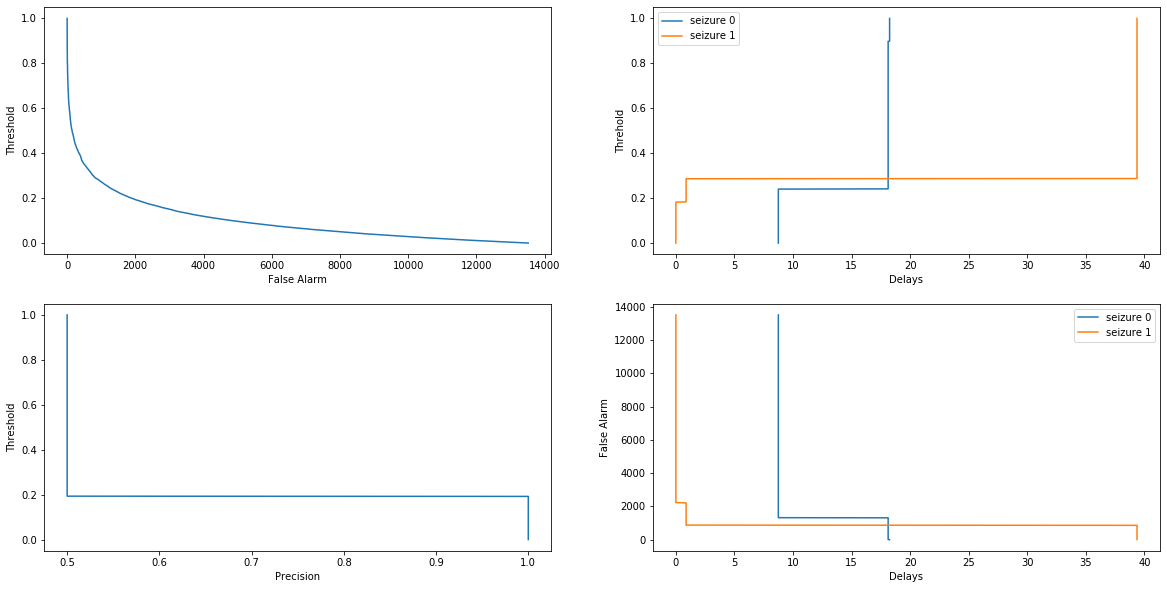

In [56]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_min, delays_min, precisions_min)

In [57]:
scores_min  = compute_score_on_seizures(thresholds, false_alarms_min, precisions_min, delays_min, weights)

Max score for seizure 0 is 0.965935508344096 for t=0.192
FA: 2024
Delay: 8.750303829994097
Precision: 1.0

Max score for seizure 1 is 0.9887495502117454 for t=0.192
FA: 2024
Delay: 0.8750303829994097
Precision: 1.0



In [58]:
scores_min_f = compute_overall_score(scores_min)

Distance score 0.011407020933824674
Averaged seizures score 0.9773425292779208
Overall score 85.67903354852758


## Max feature

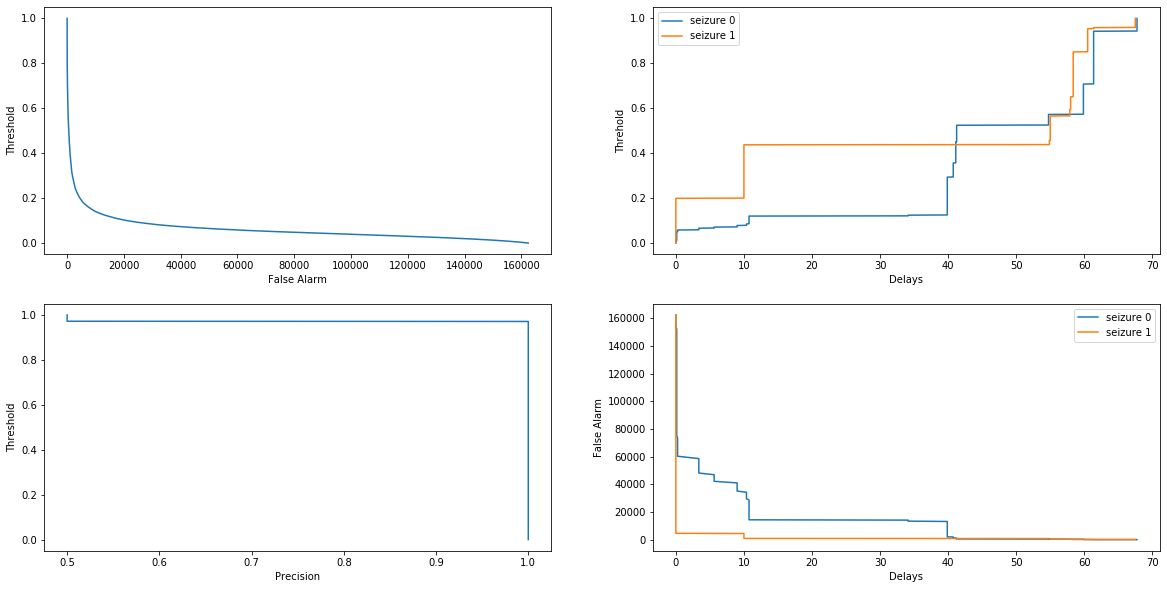

In [59]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_max, delays_max, precisions_max)

In [60]:
scores_max  = compute_score_on_seizures(thresholds, false_alarms_max, precisions_max, delays_max, weights)

Max score for seizure 0 is 0.9692980178923902 for t=0.078
FA: 35098
Delay: 9.00031251085107
Precision: 1.0

Max score for seizure 1 is 0.9996088235812549 for t=0.199
FA: 4517
Delay: 0.0
Precision: 1.0



In [61]:
scores_max_f = compute_overall_score(scores_max)

Distance score 0.0623693533346068
Averaged seizures score 0.9844534207368225
Overall score 15.784249284344915


## Energy feature

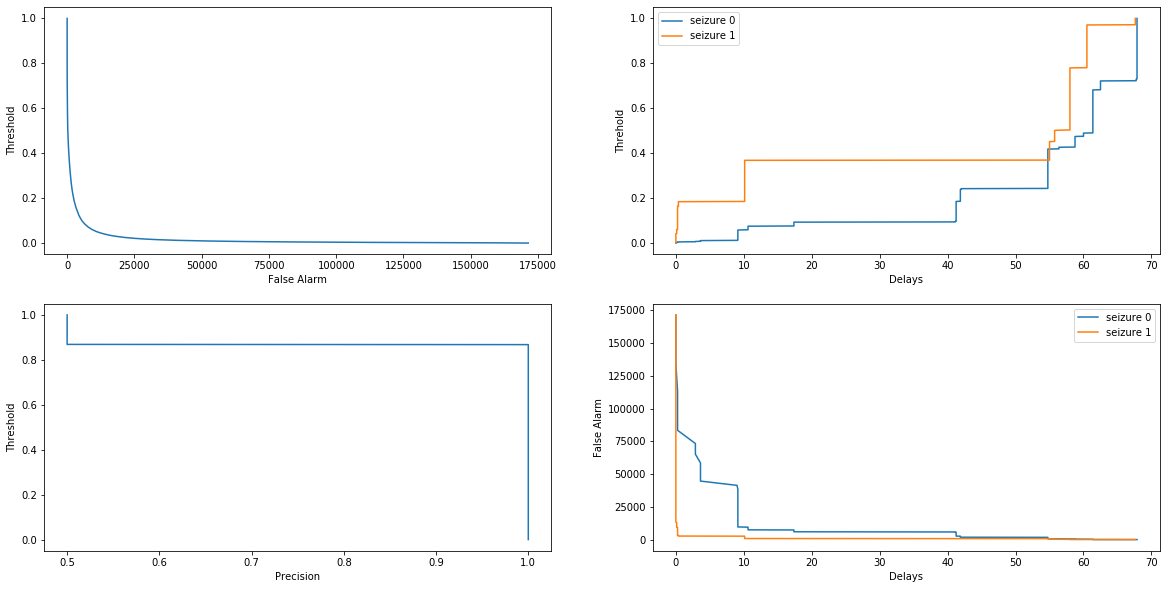

In [62]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_energy, delays_energy, precisions_energy)

In [63]:
scores_energy  = compute_score_on_seizures(thresholds, false_alarms_energy, precisions_energy, delays_energy, weights)

Max score for seizure 0 is 0.9895441972780928 for t=0.058
FA: 9636
Delay: 9.125316851279559
Precision: 1.0

Max score for seizure 1 is 0.9998573218155242 for t=0.184
FA: 2683
Delay: 0.3750130212854613
Precision: 1.0



In [64]:
scores_energy_f = compute_overall_score(scores_energy)

Distance score 0.06321068054080056
Averaged seizures score 0.9947007595468085
Overall score 15.736276702554397


## Line length feature

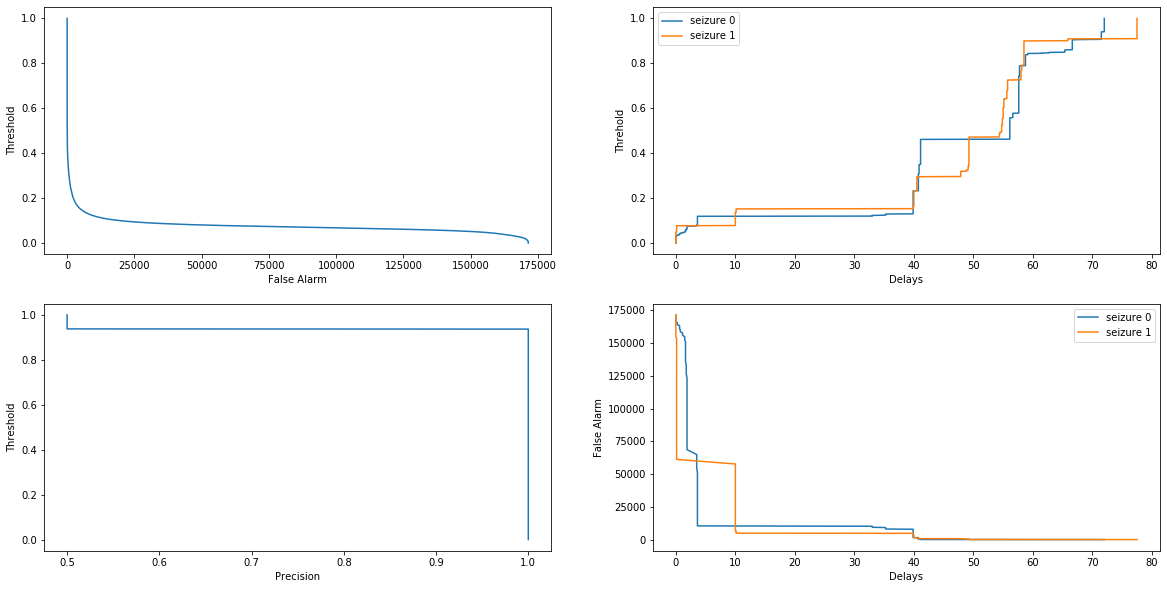

In [65]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_line_length, delays_line_length, precisions_line_length)

In [66]:
scores_line_length = compute_score_on_seizures(thresholds, false_alarms_line_length, precisions_line_length, delays_line_length, weights)

Max score for seizure 0 is 0.9970587452882923 for t=0.11900000000000001
FA: 10441
Delay: 3.6251258724261257
Precision: 1.0

Max score for seizure 1 is 0.9417933279954661 for t=0.077
FA: 61177
Delay: 0.1250043404284871
Precision: 1.0



In [67]:
scores_line_length_f = compute_overall_score(scores_line_length)

Distance score 0.034706866570428874
Averaged seizures score 0.9694260366418792
Overall score 27.931822501886547


## Moving AVG feature

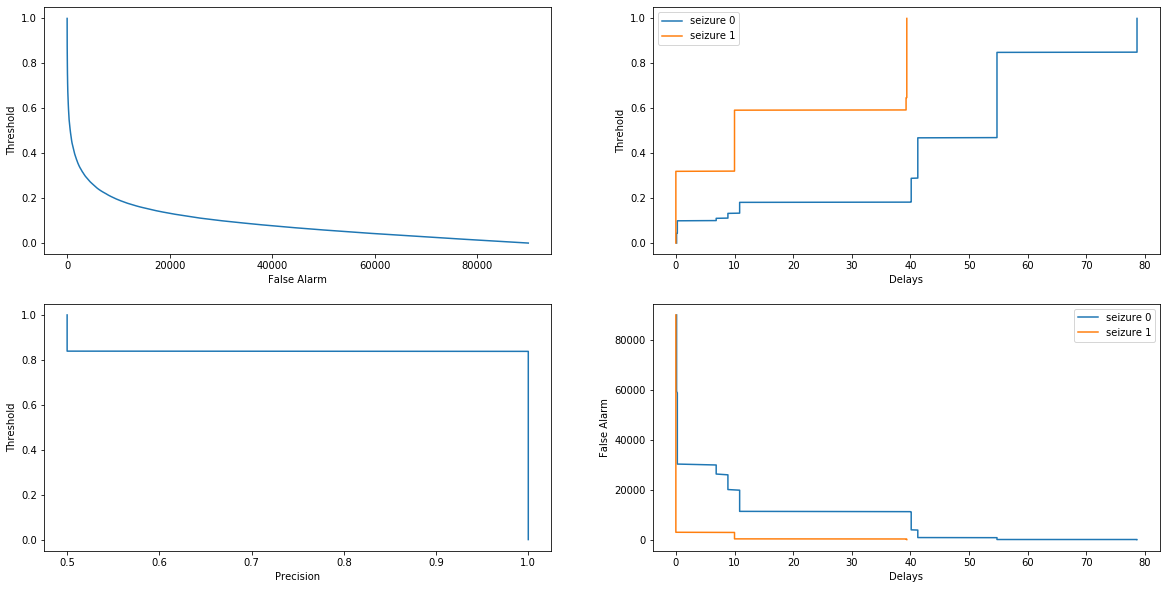

In [68]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_moving_avg, delays_moving_avg, precisions_moving_avg)

In [69]:
scores_moving_avg = compute_score_on_seizures(thresholds, false_alarms_moving_avg, precisions_moving_avg, delays_moving_avg, weights)

Max score for seizure 0 is 0.9702170052844147 for t=0.132
FA: 20034
Delay: 8.875308170422585
Precision: 1.0

Max score for seizure 1 is 0.9994679607908694 for t=0.319
FA: 2923
Delay: 0.0
Precision: 1.0



In [70]:
scores_moving_avg_f = compute_overall_score(scores_moving_avg)

Distance score 0.09463696212109805
Averaged seizures score 0.9848424830376421
Overall score 10.40653103147406


## Skewness

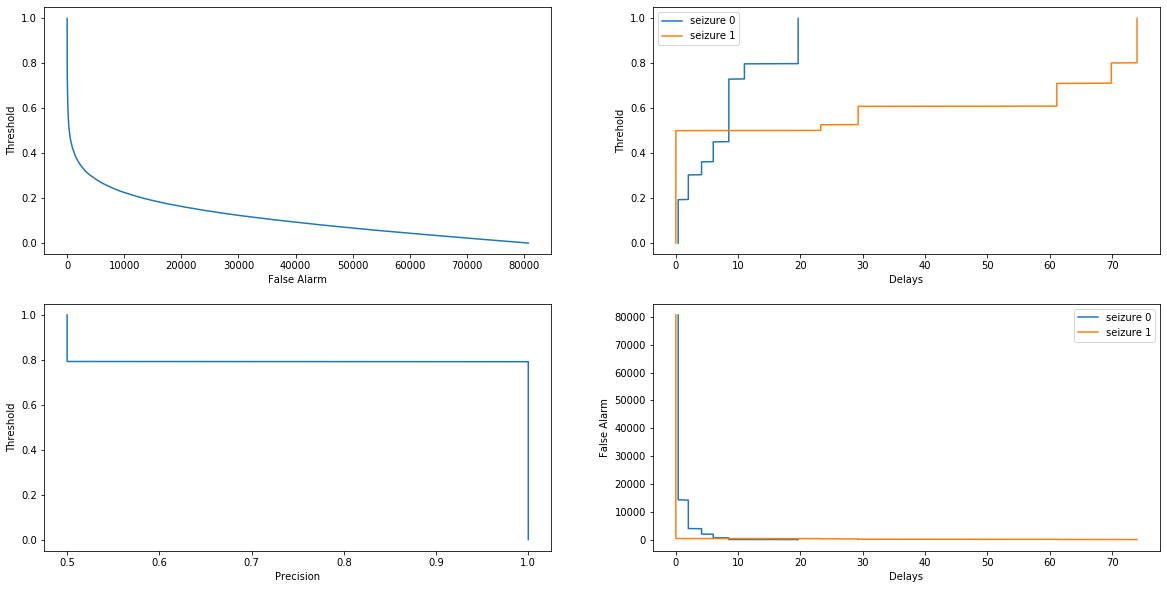

In [71]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_skewness, delays_skewness, precisions_skewness)

In [72]:
scores_skewness = compute_score_on_seizures(thresholds, false_alarms_skewness, precisions_skewness, delays_skewness, weights)

Max score for seizure 0 is 0.9984286080207625 for t=0.303
FA: 3965
Delay: 2.0000694468557936
Precision: 1.0

Max score for seizure 1 is 0.9999841021261072 for t=0.5
FA: 378
Delay: 0.0
Precision: 1.0



In [73]:
scores_skewness_f = compute_overall_score(scores_skewness)

Distance score 0.09850307046218378
Averaged seizures score 0.9992063550734349
Overall score 10.143910746995845


## kurtosis

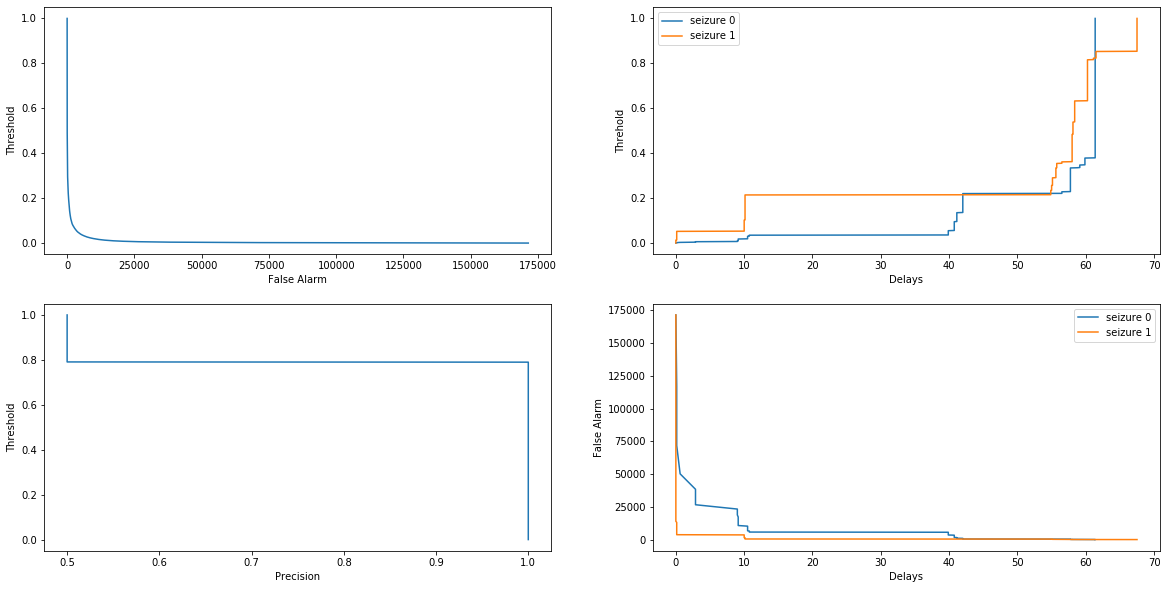

In [74]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_kurtosis, delays_kurtosis, precisions_kurtosis)

In [75]:
scores_kurtosis = compute_score_on_seizures(thresholds, false_alarms_kurtosis, precisions_kurtosis, delays_kurtosis, weights)

Max score for seizure 0 is 0.9890847954563059 for t=0.018000000000000002
FA: 10715
Delay: 9.125316851279559
Precision: 1.0

Max score for seizure 1 is 0.9997589434973732 for t=0.052000000000000005
FA: 3712
Delay: 0.1250043404284871
Precision: 1.0



In [76]:
scores_kurtosis_f = compute_overall_score(scores_kurtosis)

Distance score 0.01781809078158081
Averaged seizures score 0.9944218694768395
Overall score 55.80967577653205


## Shannon entropy

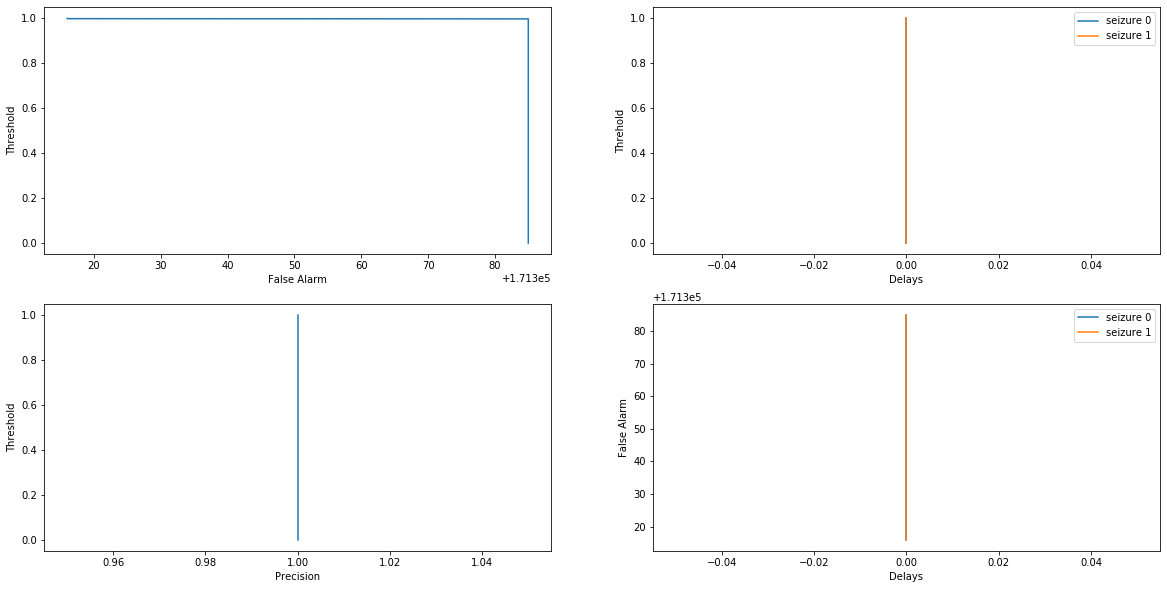

In [77]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_shannon_entropy, delays_shannon_entropy, precisions_shannon_entropy)

In [78]:
scores_shannon_entropy = compute_score_on_seizures(thresholds, false_alarms_shannon_entropy, precisions_shannon_entropy, delays_shannon_entropy, weights)

Max score for seizure 0 is nan for t=0.0
FA: 171385
Delay: 0.0
Precision: 1.0

Max score for seizure 1 is nan for t=0.0
FA: 171385
Delay: 0.0
Precision: 1.0



../src/helpers.py:200: RuntimeWarning: invalid value encountered in true_divide
  normalized_delays = (delays_i - min_delay) / (max_delay - min_delay)


In [79]:
scores_shannon_entropy_f = compute_overall_score(scores_shannon_entropy)

Distance score nan
Averaged seizures score nan
Overall score nan


## LBP feature

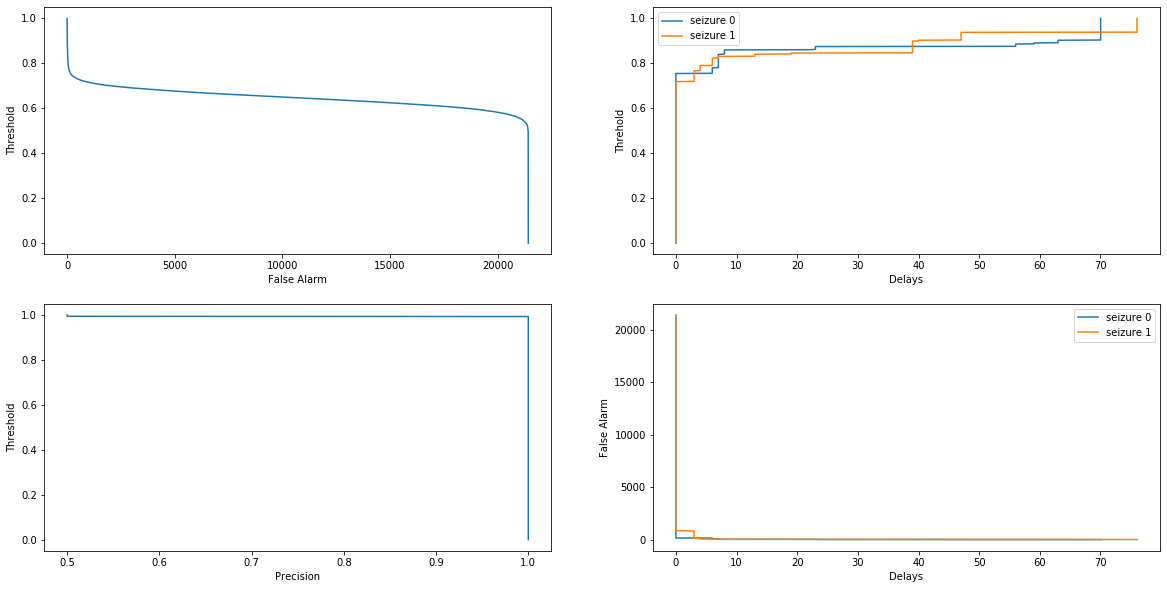

In [80]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_lbp, delays_lbp, precisions_lbp)

In [81]:
scores_lbp  = compute_score_on_seizures(thresholds, false_alarms_lbp, precisions_lbp, delays_lbp, weights)

Max score for seizure 0 is 0.9999684736485946 for t=0.754
FA: 157
Delay: 0.0
Precision: 1.0

Max score for seizure 1 is 0.9992043844779439 for t=0.766
FA: 108
Delay: 3.000833564879133
Precision: 1.0



In [82]:
scores_lbp_f = compute_overall_score(scores_lbp)

Distance score 0.006012150868464339
Averaged seizures score 0.9995864290632692
Overall score 166.26103551499696


## Phase synchrony feature

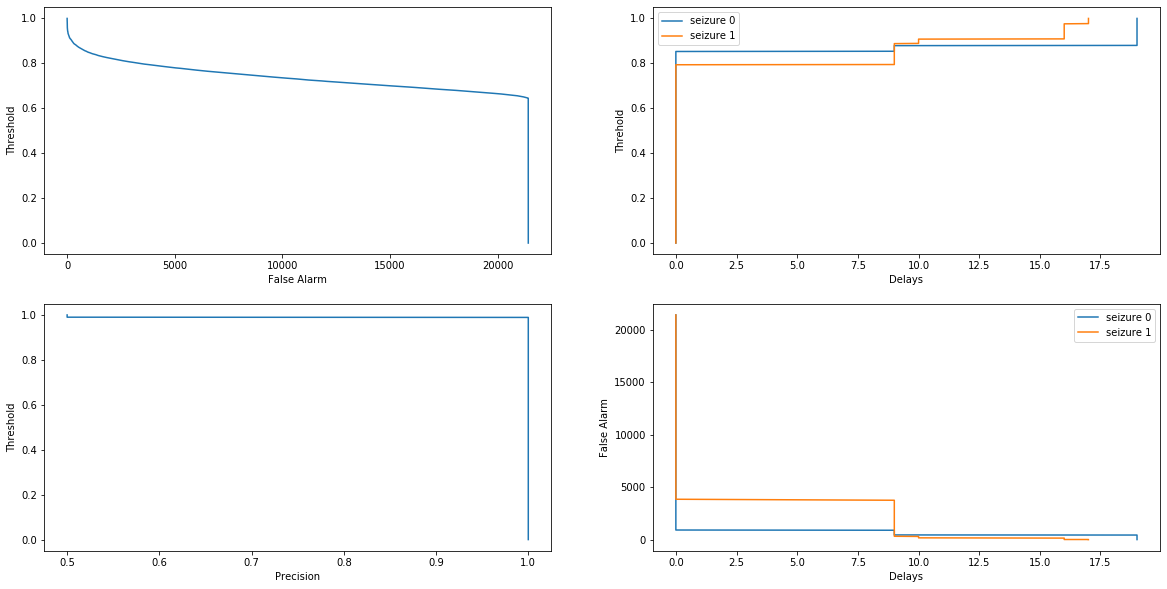

In [83]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_phase_synchrony, delays_phase_synchrony, precisions_phase_synchrony)

In [84]:
scores_phase_synchrony  = compute_score_on_seizures(thresholds, false_alarms_phase_synchrony, precisions_phase_synchrony, delays_phase_synchrony, weights)

Max score for seizure 0 is 0.9990915708326126 for t=0.852
FA: 912
Delay: 0.0
Precision: 1.0

Max score for seizure 1 is 0.9842670539722425 for t=0.793
FA: 3845
Delay: 0.0
Precision: 1.0



In [85]:
scores_phase_synchrony_f = compute_overall_score(scores_phase_synchrony)

Distance score 0.03041696196262618
Averaged seizures score 0.9916793124024275
Overall score 32.60283895613639


# Final results

In [86]:
print("Min feature", scores_min_f)
print("Max feature", scores_max_f)
print("Energy feature", scores_energy_f)
print("Line length feature", scores_line_length_f)
print("Moving avg feature", scores_moving_avg_f)
print("Skewness feature", scores_skewness_f)
print("Kurtosis feature", scores_kurtosis_f)
print("Shannon Entropy",scores_shannon_entropy_f)
print("LBP", scores_lbp_f)
print("Phase synchrony",scores_phase_synchrony_f)

Min feature 85.67903354852758
Max feature 15.784249284344915
Energy feature 15.736276702554397
Line length feature 27.931822501886547
Moving avg feature 10.40653103147406
Skewness feature 10.143910746995845
Kurtosis feature 55.80967577653205
Shannon Entropy nan
LBP 166.26103551499696
Phase synchrony 32.60283895613639
